# M2608.001300 Machine Learning <br> Assignment #5.1 Expectation Maximization for Gaussian Mixture Models

Copyright (C) Data Science Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jangho Lee, May 2018

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **student_id** as input argument. <br>
This will produce a zipped file called *[student_id].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; student_id)

In [22]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from sys import maxsize

In [69]:
# Generate 2 clusters which are folloing the Gaussian distribution
# Set the Gaussian parameters randomly 
# e.g. mu1 = [2, 4], sigma1 = [ [1,0], [0,2]]
mu1 = [2, 4]
sigma1 = [[1, 0],[0, 2]]

mu2 = [7, 8]
sigma2 = [[2, 0],[0, 1]]


# Generate 100 data points following the mu and sigma value
# (More data points require a lot of time to carry out computation)
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T



xs = np.concatenate((x1, x2)) # (200, )
ys = np.concatenate((y1, y2)) # (200, )

labels = ([1] * 100) + ([2] * 100) 

# Insert generated data into your frame (e.g. list, dictionary, and other packages)
# Recommend using a DataFrame in Pandas package (DataFrame)

#label : soft label in (0,1), same as gamma
#hardlabel : hard label, 1 or 2
data = {'x':xs, 'y':ys, 'label':labels, 'hardlabel':labels}
#df = pd.DataFrame(data=data) # insert data into df using DataFrame
df = data.copy()

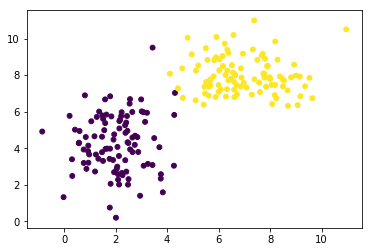

In [70]:
# Plot the data to check 
fig = plt.figure()
plt.scatter(data['x'], data['y'], 24, c=data['label'])
# fig.savefig("true-values.png")

In [71]:
# Calculate probability that a point came from a Guassian with given parameters
# Note that the covariance must be diagonal for this to work
from scipy.stats import multivariate_normal

def probability(val, mu, sigma, lam):
    # mu = [mu1, mu2]
    # sigma = [sigma1, sigma2]
    # lam: scalar
    # val:[x, y]
    
    #print(mu)
    #print(sigma)
    
    'To do'
    gd1 = multivariate_normal(mu[0], sigma[0])
    gd2 = multivariate_normal(mu[1], sigma[1])
    
    psi1 = gd1.pdf(val)
    psi2 = gd2.pdf(val)
    
    p1 = lam*psi1 
    p2 = (1-lam)*psi2
    
    prob = p1/(p1+p2)
    
    return prob

In [72]:
# Expectation step: assign every data point to its most likely cluster
def expectation(dataFrame, parameters):
    
    x = dataFrame['x']
    y = dataFrame['y']
    label = []
    hlabel = []
    #print(x)
    #print(y)
    #print(parameters['mu1'])
    
    mu = [parameters['mu1'], parameters['mu2']]
    sigma = [parameters['sigma1'], parameters['sigma1']]
    lam = parameters['lambda']
    
    for i in range(len(x)):
        val = [x[i], y[i]]
        prob = probability(val, mu, sigma, lam)
        label.append(prob)
        if prob<0.5:
            hlabel.append(1)
        else:
            hlabel.append(2)
    
    df = {'x':x, 'y':y, 'label':label, 'hardlabel':hlabel}
    #df = pd.DataFrame(data=data) # insert data into df using DataFrame
    
    return df

In [102]:
# Maximization step: update estimates of lambda, mu and sigma
def maximization(dataFrame, parameters):
    
    mu1 = parameters['mu1']
    mu2 = parameters['mu2']
    
    x = dataFrame['x']
    y = dataFrame['y']
    label = dataFrame['label']
    
    N = len(label)
    
    n1 = 0
    n2 = 0
    sigma1 = [[0,0], [0,0]]
    sigma2 = [[0,0], [0,0]]
    
    for i in range(N):
        n1 += label[i]
        n2 += (1-label[i])
        sigma1[0][0] += label[i]*((x[i]-mu1[0])**2)
        sigma1[1][1] += label[i]*((y[i]-mu1[1])**2)
        sigma2[0][0] += (1-label[i])*((x[i]-mu2[0])**2)
        sigma2[1][1] += (1-label[i])*((y[i]-mu2[1])**2)
   
    sigma1[0][0] /= n1
    sigma1[1][1] /= n1
    sigma2[0][0] /= n2
    sigma2[1][1] /= n2
    
    sigma1[0][0] **= 0.5
    sigma1[1][1] **= 0.5
    sigma2[0][0] **= 0.5
    sigma2[1][1] **= 0.5
    
    mu1 = [0, 0]
    mu2 = [0, 0]
    lam = 0
    
    for i in range(N):
        mu1[0] += label[i]*x[i]
        mu1[1] += label[i]*y[i]
        mu2[0] += (1-label[i])*x[i]
        mu2[1] += (1-label[i])*y[i]
        lam += label[i]
        
    mu1[0] /= n1
    mu1[1] /= n1
    mu2[0] /= n2
    mu2[1] /= n2
    lam /= N
    
    
    param =  { 'mu1': mu1, 'sigma1': sigma1, 'mu2': mu2, 'sigma2': sigma2, 'lambda': lam }
        
    
    return param

In [103]:
# Calcuate the euclidean distance between points used for determining if params have converged
def distance(old_params, new_params):
    dist = 0
    
    
    dist += (old_params['lambda']-new_params['lambda']) ** 2
    dist += (old_params['mu1'][0]-new_params['mu1'][0]) ** 2
    dist += (old_params['mu2'][0]-new_params['mu2'][0]) ** 2
    dist += (old_params['sigma1'][0][0]-new_params['sigma1'][0][0]) ** 2
    dist += (old_params['sigma2'][1][1]-new_params['sigma2'][1][1]) ** 2
    
    return dist ** 0.5

In [111]:
##DRAW SOFT LABEL

# Loop until parameters converge
shift = 1000000 # set a sufficiently large nubmer (e.g. 1000000)
epsilon = 0.01 # threshold value to control the convergence (e.g. 0.01)
iters = 0
df_copy = df.copy()

# Initial guesses (data)- intentionally bad
"""
ORIGINAL params
mu1 = [2, 4]
sigma1 = [[1, 0],[0, 2]]

mu2 = [7, 8]
sigma2 = [[2, 0],[0, 1]]
"""

guess = { 'mu1': [6, 2],
          'sigma1': [[2, 0], [0, 1]],
          'mu2': [3, 8],
          'sigma2': [[1, 0], [0, 2]],
          'lambda': 0.5 # mixing coefficient
        }

# Initial guess (label)- intentionally bad
df_copy['label'] = ([2] * 100) + ([1] * 100)
df_copy['hardlabel'] = ([2] * 100) + ([1] * 100)
# Insert guess into parameters
#params = pd.DataFrame(guess)
params = guess.copy()

iteration 1, shift 4.93941190301492
iteration 2, shift 3.0757311251066675
iteration 3, shift 0.9012568920585186
iteration 4, shift 0.13807326454644211
iteration 5, shift 0.007544066622520762


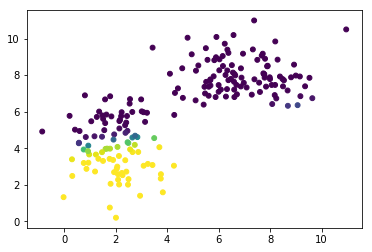

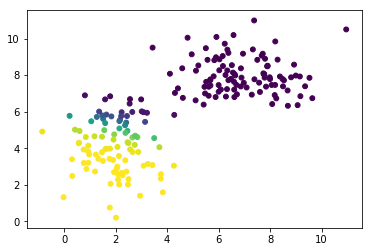

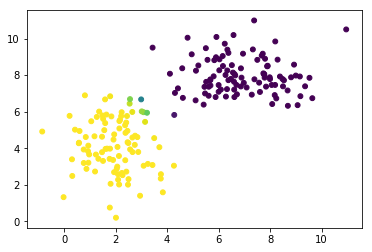

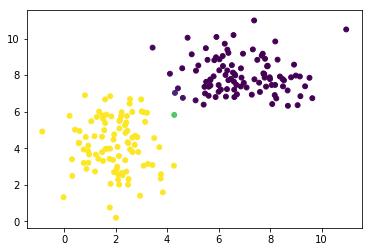

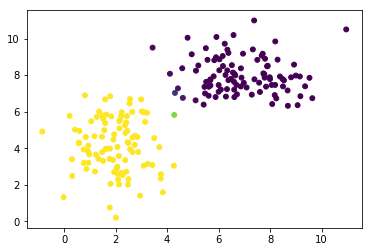

In [112]:
while shift > epsilon:
    iters += 1

    # E-step
    updated_labels = expectation(df_copy, params) # use expectation function

    # M-step
    updated_parameters = maximization(updated_labels, params) # use maximization function

    # Check whether our estimates parameters changed or not
    shift = distance(params, updated_parameters)
    print("iteration {}, shift {}".format(iters, shift))

    # Update labels and params for the next iteration
    df_copy = updated_labels
    params = updated_parameters

    fig = plt.figure()
    plt.scatter(df_copy['x'], df_copy['y'], 24, c=df_copy['label'])
#   fig.savefig("iteration{}.png".format(iters))

In [113]:
##DRAW HARD LABEL

# Loop until parameters converge
shift = 1000000 # set a sufficiently large nubmer (e.g. 1000000)
epsilon = 0.01 # threshold value to control the convergence (e.g. 0.01)
iters = 0
df_copy = df.copy()

# Initial guesses (data)- intentionally bad
"""
ORIGINAL params
mu1 = [2, 4]
sigma1 = [[1, 0],[0, 2]]

mu2 = [7, 8]
sigma2 = [[2, 0],[0, 1]]
"""

guess = { 'mu1': [6, 2],
          'sigma1': [[2, 0], [0, 1]],
          'mu2': [3, 8],
          'sigma2': [[1, 0], [0, 2]],
          'lambda': 0.5 # mixing coefficient
        }

# Initial guess (label)- intentionally bad
df_copy['label'] = ([2] * 100) + ([1] * 100)
df_copy['hardlabel'] = ([2] * 100) + ([1] * 100)
# Insert guess into parameters
#params = pd.DataFrame(guess)
params = guess.copy()

iteration 1, shift 4.93941190301492
iteration 2, shift 3.0757311251066675
iteration 3, shift 0.9012568920585186
iteration 4, shift 0.13807326454644211
iteration 5, shift 0.007544066622520762


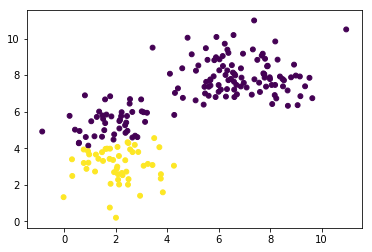

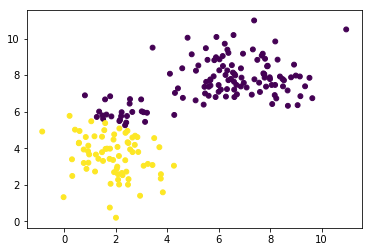

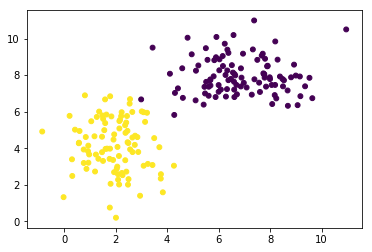

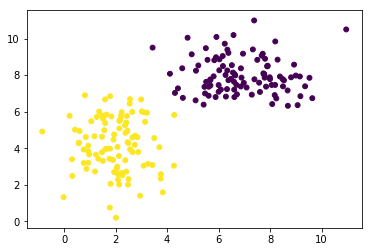

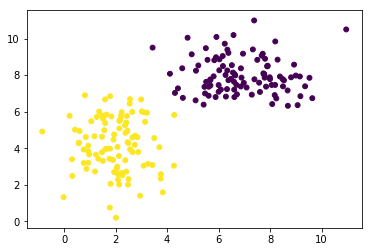

In [114]:
while shift > epsilon:
    iters += 1

    # E-step
    updated_labels = expectation(df_copy, params) # use expectation function

    # M-step
    updated_parameters = maximization(updated_labels, params) # use maximization function

    # Check whether our estimates parameters changed or not
    shift = distance(params, updated_parameters)
    print("iteration {}, shift {}".format(iters, shift))

    # Update labels and params for the next iteration
    df_copy = updated_labels
    params = updated_parameters

    fig = plt.figure()
    plt.scatter(df_copy['x'], df_copy['y'], 24, c=df_copy['hardlabel'])
    
#   fig.savefig("iteration{}.png".format(iters))

In [115]:
from pprint import pprint
pprint(params)

{'lambda': 0.49067096253552,
 'mu1': [1.997514336586875, 4.175942302040888],
 'mu2': [6.912193158521652, 7.996542027083091],
 'sigma1': [[0.971920609597235, 0], [0, 1.4688252991470583]],
 'sigma2': [[1.3974444741977372, 0], [0, 0.9866823333901418]]}
